### Import libraries:

In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as path_effects

from PIL import Image
import requests
from io import BytesIO

### Import data:

In [3]:
df = pd.read_csv('premierleagueplayers.csv', encoding='latin1')

df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
0,1,Max Aarons,eng ENG,DF,Norwich City,21,2000,34,32,2881,...,0.06,0.7,0.7,1.4,2.1,0.02,0.04,0.07,0.02,0.07
1,2,Che Adams,sct SCO,FW,Southampton,25,1996,30,23,2039,...,0.44,7.1,7.1,2.6,9.7,0.31,0.12,0.43,0.31,0.43
2,3,Rayan Aït Nouri,fr FRA,DF,Wolves,20,2001,23,20,1828,...,0.15,0.7,0.7,1.3,2.1,0.04,0.07,0.10,0.04,0.10
3,4,Kristoffer Ajer,no NOR,DF,Brentford,23,1998,24,23,1995,...,0.18,0.8,0.8,1.4,2.2,0.04,0.06,0.10,0.04,0.10
4,5,Nathan Aké,nl NED,DF,Manchester City,26,1995,14,10,923,...,0.20,1.1,1.1,0.5,1.6,0.11,0.05,0.16,0.11,0.16


In [4]:
df.isna().sum()

Rk           0
Player       0
Nation       0
Pos          0
Squad        0
Age          0
Born         0
MP           0
Starts       0
Min          0
90s          0
Gls          0
Ast          0
G-PK         0
PK           0
PKatt        0
CrdY         0
CrdR         0
Gls.1        0
Ast.1        0
G+A          0
G-PK.1       0
G+A-PK       0
xG           0
npxG         0
xA           0
npxG+xA      0
xG.1         0
xA.1         0
xG+xA        0
npxG.1       0
npxG+xA.1    0
dtype: int64

### Columns list:

In [5]:
for column in df.columns:
    print(column)

Rk
Player
Nation
Pos
Squad
Age
Born
MP
Starts
Min
90s
Gls
Ast
G-PK
PK
PKatt
CrdY
CrdR
Gls.1
Ast.1
G+A
G-PK.1
G+A-PK
xG
npxG
xA
npxG+xA
xG.1
xA.1
xG+xA
npxG.1
npxG+xA.1


### Filter for players that have featured in at least 10 games in Premier League:

In [6]:
df = df[df['MP'] >= 10]

df

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
0,1,Max Aarons,eng ENG,DF,Norwich City,21,2000,34,32,2881,...,0.06,0.7,0.7,1.4,2.1,0.02,0.04,0.07,0.02,0.07
1,2,Che Adams,sct SCO,FW,Southampton,25,1996,30,23,2039,...,0.44,7.1,7.1,2.6,9.7,0.31,0.12,0.43,0.31,0.43
2,3,Rayan Aït Nouri,fr FRA,DF,Wolves,20,2001,23,20,1828,...,0.15,0.7,0.7,1.3,2.1,0.04,0.07,0.10,0.04,0.10
3,4,Kristoffer Ajer,no NOR,DF,Brentford,23,1998,24,23,1995,...,0.18,0.8,0.8,1.4,2.2,0.04,0.06,0.10,0.04,0.10
4,5,Nathan Aké,nl NED,DF,Manchester City,26,1995,14,10,923,...,0.20,1.1,1.1,0.5,1.6,0.11,0.05,0.16,0.11,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,541,Wilfried Zaha,ci CIV,FW,Crystal Palace,28,1992,33,31,2760,...,0.33,9.4,4.0,4.8,8.8,0.31,0.16,0.46,0.13,0.29
542,543,Oleksandr Zinchenko,ua UKR,DF,Manchester City,24,1996,15,10,1047,...,0.34,0.4,0.4,2.0,2.5,0.04,0.18,0.21,0.04,0.21
543,544,Hakim Ziyech,ma MAR,FWMF,Chelsea,28,1993,23,14,1319,...,0.48,3.4,3.4,3.5,6.9,0.23,0.24,0.47,0.23,0.47
544,545,Kurt Zouma,fr FRA,DF,West Ham,26,1994,24,24,2078,...,0.04,0.9,0.9,0.0,0.9,0.04,0.00,0.04,0.04,0.04


### Subsetting for Forwards, removing unnecessary columns, renaming columns:

In [7]:
fw_df = df[['Rk', 'Player', 'Pos', 'Squad', 'Gls', 'Ast', 'Gls.1', 'Ast.1', 'xG', 'xA', 'xG.1', 'xA.1', 'MP', 'Starts', 'Min']]

fw_df.rename(columns = {"Gls.1":"GlsPer90", "Ast.1":"AstPer90", "xG.1":"xGPer90", "xA.1":"xAPer90"}, inplace=True)

fw_df = fw_df[fw_df['Pos'].isin(['FW', 'MFFW', 'FWMF'])]

fw_df.head()

C:\Users\seanb\AppData\Local\Temp\ipykernel_19596\1765652814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fw_df.rename(columns = {"Gls.1":"GlsPer90", "Ast.1":"AstPer90", "xG.1":"xGPer90", "xA.1":"xAPer90"}, inplace=True)


,Rk,Player,Pos,Squad,Gls,Ast,GlsPer90,AstPer90,xG,xA,xGPer90,xAPer90,MP,Starts,Min
1,2,Che Adams,FW,Southampton,7,3,0.31,0.13,7.1,2.6,0.31,0.12,30,23,2039
10,11,Dele Alli,MFFW,Tottenham,1,0,0.14,0.00,1.5,0.8,0.20,0.11,10,8,657
12,13,Miguel Almirón,MFFW,Newcastle Utd,1,0,0.05,0.00,2.1,0.7,0.11,0.03,30,19,1716
17,18,Michail Antonio,FW,West Ham,10,8,0.30,0.24,11.1,6.6,0.34,0.20,36,34,2971
20,21,Adam Armstrong,FW,Southampton,2,2,0.13,0.13,4.3,1.7,0.27,0.11,23,17,1413


### Premier League general statistics:

In [8]:
fw_df.describe()

,Rk,Gls,Ast,GlsPer90,AstPer90,xG,xA,xGPer90,xAPer90,MP,Starts,Min
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,293.534884,5.294574,2.883721,0.276434,0.156899,5.402326,2.620155,0.290155,0.141783,25.751938,18.023256,1626.162791
std,160.164566,4.612150,2.632810,0.194799,0.129112,4.134222,1.981176,0.144070,0.067759,7.384561,9.468257,786.363781
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.100000,0.020000,0.020000,10.000000,0.000000,186.000000
25%,164.000000,2.000000,1.000000,0.140000,0.070000,2.400000,1.200000,0.180000,0.090000,20.000000,11.000000,996.000000
50%,303.000000,4.000000,2.000000,0.260000,0.140000,4.400000,2.000000,0.270000,0.130000,26.000000,17.000000,1564.000000
75%,421.000000,8.000000,4.000000,0.370000,0.210000,7.000000,3.500000,0.370000,0.190000,32.000000,25.000000,2229.000000
max,544.000000,23.000000,13.000000,1.450000,0.610000,21.800000,10.400000,0.880000,0.340000,38.000000,37.000000,3253.000000


### Everton FC forwards:

In [9]:
EFC_df = fw_df[fw_df['Squad'] == 'Everton']
EFC_df

,Rk,Player,Pos,Squad,Gls,Ast,GlsPer90,AstPer90,xG,xA,xGPer90,xAPer90,MP,Starts,Min
65,66,Dominic Calvert-Lewin,FW,Everton,5,2,0.35,0.14,6.8,1.8,0.48,0.13,17,15,1283
191,192,Anthony Gordon,MFFW,Everton,4,2,0.16,0.08,3.4,3.3,0.13,0.13,35,25,2285
194,195,Demarai Gray,MFFW,Everton,5,4,0.19,0.15,4.5,4.3,0.17,0.16,34,28,2338
404,405,Richarlison,FWMF,Everton,10,5,0.36,0.18,10.2,2.4,0.36,0.09,30,28,2523
418,419,Salomón Rondón,FW,Everton,1,1,0.11,0.11,2.2,0.7,0.25,0.09,20,8,790


### Visualisation: Everton forwards compared to other Premier League forwards, Goals and Assists:

C:\Users\seanb\AppData\Local\Temp\ipykernel_19596\3101053106.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


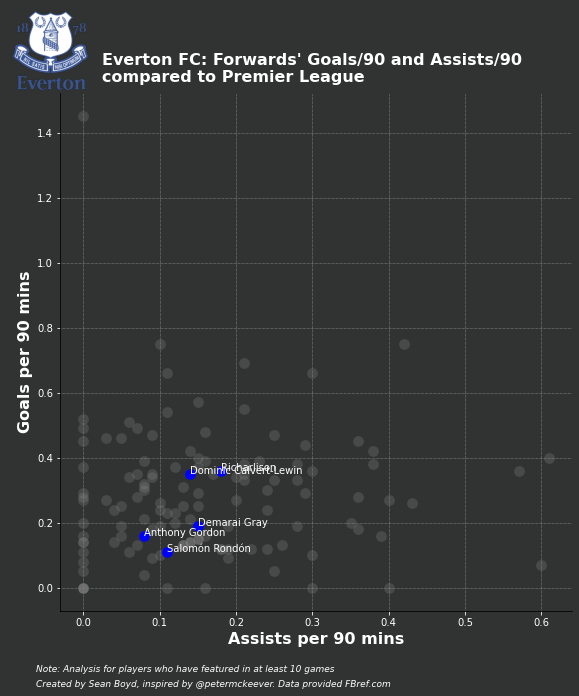

In [12]:
team = 'Everton'

text_color = 'w'
filler = 'grey'
primary = 'blue'
background = '#313332'
title_font = "Alegreya Sans"
body_font = "Open Sans"

mpl.rcParams["xtick.color"] = text_color
mpl.rcParams["ytick.color"] = text_color
mpl.rcParams["xtick.labelsize"] = 10
mpl.rcParams["ytick.labelsize"] = 10

fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor(background)
ax.patch.set_alpha(0)

ax.grid(ls='dotted', lw='0.5', color='lightgrey', zorder=1)

x = fw_df.AstPer90.tolist()
y = fw_df.GlsPer90.tolist()

ax.scatter(x, y, s=120,color=filler,edgecolors=background,alpha=0.3,lw=0.5,zorder=2)

x = fw_df[fw_df.Squad==team].AstPer90.tolist()
y = fw_df[fw_df.Squad==team].GlsPer90.tolist()

ax.scatter(x, y, s=120, color=primary, edgecolors=background, alpha=1, lw=.25, zorder=3)

annotations = fw_df[fw_df.Squad==team].Player.tolist()

for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]), color=text_color)
        
fig.text(0.165,1,"Everton FC: Forwards' Goals/90 and Assists/90 \ncompared to Premier League", 
         fontweight='bold', fontsize=16, color=text_color, font=title_font)

ax.set_xlabel("Assists per 90 mins", fontweight='bold', fontsize=16, color=text_color)
ax.set_ylabel("Goals per 90 mins", fontweight='bold', fontsize=16, color=text_color)

spines = ["top", "right", "bottom", "left"]
for s in spines:
    if s in ["top", "right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color=text_color

ax2=fig.add_axes([0,0.98,0.15,0.15])
ax2.axis("off")
url = "https://brandslogos.com/wp-content/uploads/images/everton-fc-logo.png"
response = requests.get(url)
img=Image.open(BytesIO(response.content))
ax2.imshow(img)

fig.text(0.05, -0.025, "Note: Analysis for players who have featured in at least 10 games",
        fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)
fig.text(0.05, -0.05, "Created by Sean Boyd, inspired by @petermckeever. Data provided FBref.com",
        fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

plt.tight_layout()
plt.show()